¡Hola!

Mi nombre es Marcos Torres y tengo el gusto de revisar tu código el día de hoy.

Cuando vea algo notable o algún asunto en el notebook, te dejaré un comentario o un hint. Se que encontraras la mejor respuesta para resolver todos los comentarios, de no ser así, no te preocupes en futuras iteraciones dejaré comentarios y pistas más específicos.

Este proceso es muy parecido al que se recibe de un gerente o de un Senior Data Scientist en un trabajo real, por lo que te estarás preparando para la experiencia en la vida real.

Encontrarás comentarios en verde, amarillo o rojo como los siguientes:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. ¡Lo hiciste muy bien!
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Nota. Se puede mejorar.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesitas corregirlo. Este bloque indica que se requiere una correción. El trabajo no se acepta si tiene estos bloques.
</div>

Puedes responder a mis comentarios usando estos bloques:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Modelo de prediccion para pozo petrolero "OilyGiant"

Modelo de prediccion para pozo de extracción de petróleo OilyGiant.
La finalidad del siguiente modelo es encontrar los mejores lugares donde abrir 200 pozos nuevos de petróleo, buscando la mejor rentabilidad, con un analisis de riesgo-beneficio.

Para la construccion y entrenamiento del Modelo de prediccion se realizaran las siguientes tareas:

- Importacion de los archivos con los parámetros recogidos de pozos petrolíferos en la región seleccionada: calidad de crudo y volumen de reservas.
- Creacion de un modelo para predecir el volumen de reservas en pozos nuevos.
- Eleccion de los pozos petrolíferos con los valores estimados más altos.
- Eleccion de la región con el beneficio total más alto para los pozos petrolíferos seleccionados.
- Analisis de beneficios y riesgos potenciales utilizando la técnica bootstrapping.

__Nota:__  
- Para este modelo solo se usara el modelo de regresion lineal.
- Se tomaran en cuenta 500 puntos de estudio para la seleccion de los mejores 200 para el calculo del beneficio.
- Los datos son sintéticos por lo que los detalles del contrato y las características del pozo no se publicaran.

## Datos financieros

__1. Presupuesto:__ 100 millones de dolares para 200 pesos petroleros

__2. Ingreso por barril de materia prima:__ 4.5 USD

__3. Ingreso por unidad de producto:__ 4500 dolares (vol. en miles de barriles)

__4. Riesgo máximo permitido por region:__ 2.5% 

__5. Region a elegir :__ cumplimiento de a criterios y beneficio promedio mas alto.




## Diccionario de datos
- __id:__ identificador único de pozo de petróleo

- __f0, f1, f2__ características de los puntos (su significado específico no es importante, pero las características en sí son significativas)

- __product:__ volumen de reservas en el pozo de petróleo (miles de barriles).


## Set up de datos
Se descargan las librerias correspondientes y se guarda el data frame para analizar los datos con los que se va a trabajar y entenderlos

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
from sklearn import set_config
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score , mean_squared_error,confusion_matrix ,accuracy_score , f1_score, precision_score, recall_score ,roc_auc_score,roc_curve, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.utils import shuffle

In [2]:
df_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_2 = pd.read_csv('/datasets/geo_data_2.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien, usaste una celda independiente para importar las librerías y otra para leer los datos.
</div>

### Funciones para limpiar los df

In [3]:
# funcion para revisar duplicados
def duplicados(df,car):
    print( df[car].duplicated().sum())
    duplicated_id = list(df[df[car].duplicated()][car].unique())
    display(df[df.id.isin(duplicated_id)])
    

# funcion para eliminar caracteristica
def del_car(df,car):
    df = df.drop(['id'], axis=1)
    display(df_0)
    return df

### Analisis y limpieza de Datos

In [4]:
#Visualizo y analizo el conjunto de datos_0
display(df_0)
display(df_0.info())
print(df_0.describe())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347


Se comprueba que la caracteristica "id" no tenga duplicados.

In [5]:
# se revisan que duplicados hay en el df_0
duplicados(df_0, "id")

# se elimina caracteristica "id" de df_0
df_0 = del_car(df_0,"id")

10


,id,f0,f1,f2,product
931,HZww2,0.755284,0.368511,1.863211,30.681774
1364,bxg6G,0.411645,0.856830,-3.653440,73.604260
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
16633,fiKDv,0.157341,1.028359,5.585586,95.817889
21426,Tdehs,0.829407,0.298807,-0.049563,96.035308
41724,bxg6G,-0.823752,0.546319,3.630479,93.007798
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [6]:
#Visualizo y analizo el conjunto de datos_1
display(df_1)
display(df_1.info())
print(df_1.describe())

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%         1.153055      -4.813172       2.011479      57.085625
75%         8.621015      -1.332816       3.999904     107.813044
max        29.421755      18.734063       5.019721     137.945408


Se comprueba que la caracteristica "id" no tenga duplicados.

In [7]:
# se comprueba de que no haya clientes duplicados
#print( df_1["id"].duplicated().sum())
#duplicated_id = list(df_1[df_1["id"].duplicated()]['id'].unique())
#display(df_1[df_1.id.isin(duplicated_id)])

# se elimina caracteristica id
#df_1 = df_1.drop(['id'], axis=1)
#display(df_1)
# se revisan que duplicados hay en el df_1
duplicados(df_1, "id")

# se elimina caracteristica "id" de df_1
df_1 = del_car(df_1,"id")

4


,id,f0,f1,f2,product
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044


,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...
99995,0.971957,0.370953,6.075346,110.744026
99996,1.392429,-0.382606,1.273912,122.346843
99997,1.029585,0.018787,-1.348308,64.375443
99998,0.998163,-0.528582,1.583869,74.040764


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen uso de los métodos de pandas para explorar los datos.
</div>

In [8]:
#Visualizo y analizo el conjunto de datos_2
display(df_2)
display(df_2.info())
print(df_2.describe())

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288      -1.174820       0.130359      59.450441
50%         0.009424      -0.009482       2.484236      94.925613
75%         1.158535       1.163678       4.858794     130.595027
max         7.238262       7.844801      16.739402     190.029838


Se comprueba que la caracteristica "id" no tenga duplicados.

In [9]:
# se revisan que duplicados hay en el df_2
duplicados(df_2, "id")

# se elimina caracteristica "id" de df_2
df_2 = del_car(df_2,"id")

4


,id,f0,f1,f2,product
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572


,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...
99995,0.971957,0.370953,6.075346,110.744026
99996,1.392429,-0.382606,1.273912,122.346843
99997,1.029585,0.018787,-1.348308,64.375443
99998,0.998163,-0.528582,1.583869,74.040764


Se comprobo que efectivamente hay pozos con id duplicados, pero ya que los datos de las caracteristicas no son los mismos se mantendran estos datos. Tambien se procedio a eliminar para los 3 conjuntos de datos la caracteristica "id" ya que no aporta informacion al modelo .

Por otra parte estos son los productos promedios, min y max de cada region.

- __Region 0__ promedio de producto = 92.5    min= 0     max= 185
- __Region 1__ promedio de producto = 68.8    min= 0     max= 137
- __Region 2__ promedio de producto = 95      min= 0     max= 190

Lo que pudiera dar un indicio antes del entrenamiento del modelo de que la Region 2 pueda ser mas rentable con su media de volumen de producto de 95 mil barriles por pozo

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Los datos se exploraron de forma similar, se podría aprovechar esto para realizar una función que tenga como input los datos de cada región.
</div>

<div class="alert alert-block alert-info">
<b>Se agrego funcion para revisar duplicados y eliminar caracteristica de df.</b> <a class="tocSkip"></a>
</div>

### Distribucion de datos por region
Se revisa por medio de histogramas la distribucion de los datos de los pozos.

Text(0.5, 1.0, 'Volumen de Petroleo por pozo Region 0')

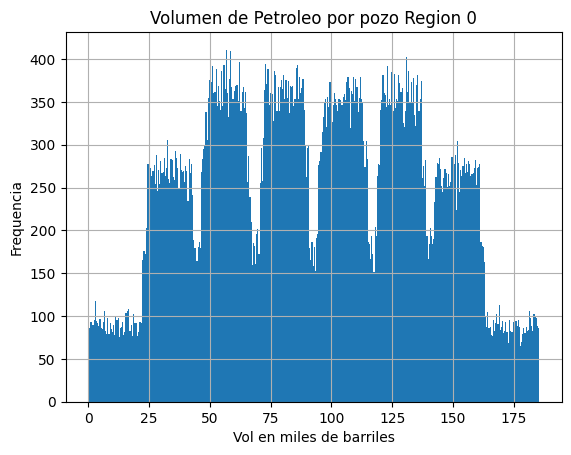

In [10]:
df_0.hist(column='product', bins=400)
plt.xlabel("Vol en miles de barriles")
plt.ylabel("Frequencia")
plt.title("Volumen de Petroleo por pozo Region 0")

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, la gráfica es correcta. Tiene el título, los ejes tienen nombres y las líneas en los ejes para facilitar su comprensión.
</div>

Text(0.5, 1.0, 'Distribucion de caracteristicas Region 0')

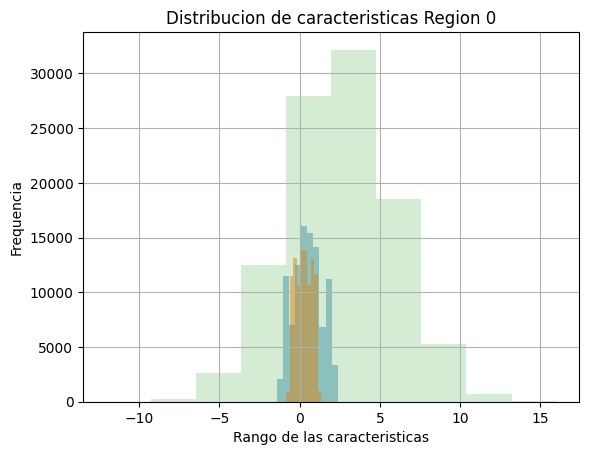

In [11]:
df_0["f0"].hist(alpha=0.4)
df_0["f1"].hist(alpha=0.5)
df_0["f2"].hist(alpha=0.2)
plt.xlabel("Rango de las caracteristicas")
plt.ylabel("Frequencia")
plt.title("Distribucion de caracteristicas Region 0")

Text(0.5, 1.0, 'Volumen de Petroleo por pozo Region 1')

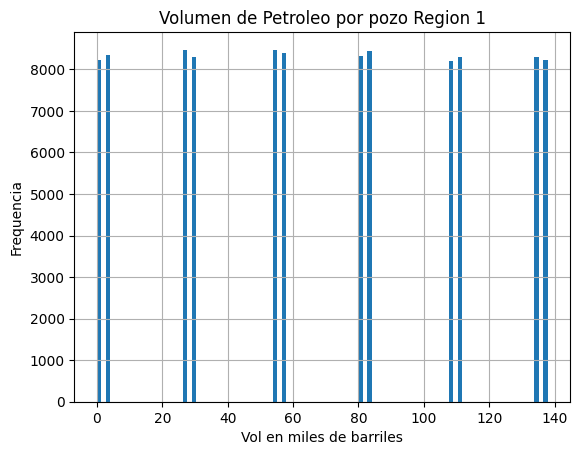

In [12]:
df_1.hist(column='product', bins=100)
plt.xlabel("Vol en miles de barriles")
plt.ylabel("Frequencia")
plt.title("Volumen de Petroleo por pozo Region 1")

Text(0.5, 1.0, 'Distribucion de caracteristicas Region 1')

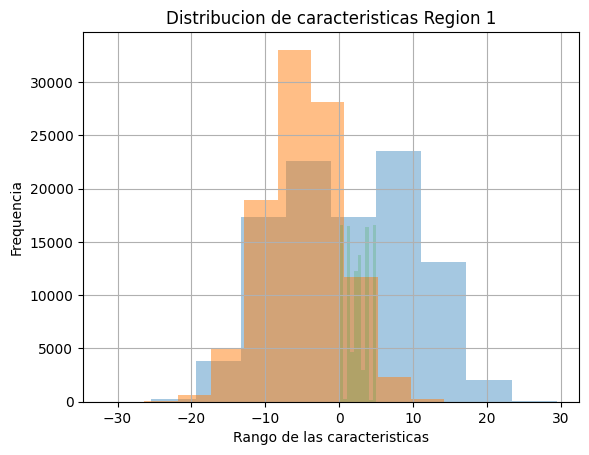

In [13]:
df_1["f0"].hist(alpha=0.4)
df_1["f1"].hist(alpha=0.5)
df_1["f2"].hist(alpha=0.2)
plt.xlabel("Rango de las caracteristicas")
plt.ylabel("Frequencia")
plt.title("Distribucion de caracteristicas Region 1")

Text(0.5, 1.0, 'Volumen de Petroleo por pozo Region 2')

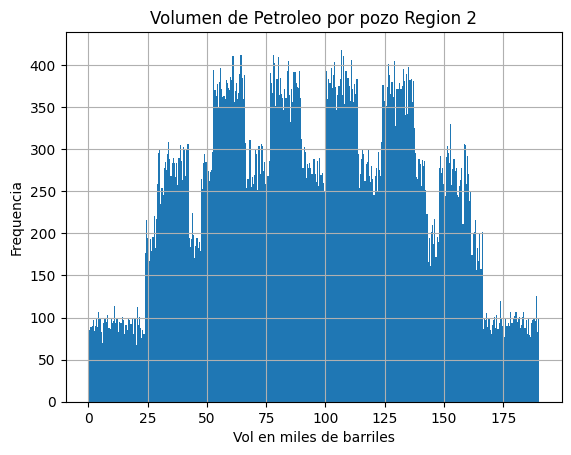

In [14]:
df_2.hist(column='product', bins=400)
plt.xlabel("Vol en miles de barriles")
plt.ylabel("Frequencia")
plt.title("Volumen de Petroleo por pozo Region 2")

Text(0.5, 1.0, 'Distribucion de caracteristicas Region 2')

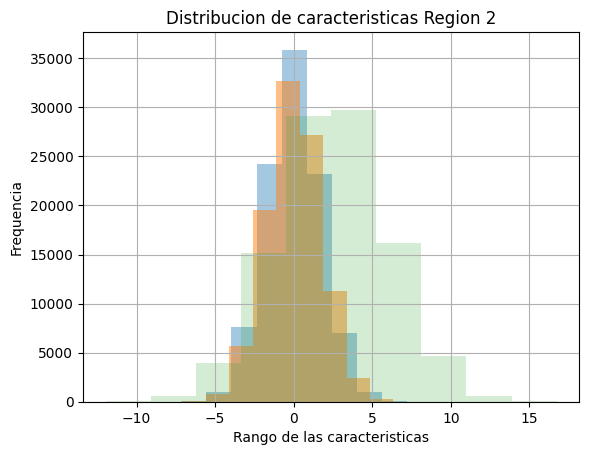

In [15]:
df_2["f0"].hist(alpha=0.4)
df_2["f1"].hist(alpha=0.5)
df_2["f2"].hist(alpha=0.2)
plt.xlabel("Rango de las caracteristicas")
plt.ylabel("Frequencia")
plt.title("Distribucion de caracteristicas Region 2")

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien, las gráficas son correctas y ayudan a visualizar la distribución de las características en cada conjunto de datos.
</div>

Se ve que los datos de los pozos varia mucho tanto en Volumen como en su frequencia, resaltando la Region 1 que parece contar con menos variacion de datos, y sus lecturas parecen ser mas puntuales, lo que hace que sus frequencias en la lectura de datos sean puntuales.

Por otro lado tambien se aprecia que las escalas de las caracteristicas en cada región varia mucho, por lo que se procedera a estandarizarlas por medio de un "escalado de caracteristicas"


## Entrenamiento y prueba de modelo por region

### Region 0

#### Division de datos
Se divide el conjunto de datos en un conjunto de entrenamiento y validacion con una proporcion de 75:25

In [16]:
target = df_0['product']
features = df_0.drop(['product'], axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

#### Escalado de datos

In [17]:
# Se crea una lista con todas las caracteristicas numericas
numeric = ["f0", "f1" , "f2"]

# se estandarizan los datos para facilitar que los algoritmos entrene
scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

print(features_train.shape)
print(features_train.head())

(75000, 3)
             f0        f1        f2
27212 -0.544828  1.390264 -0.094959
7866   1.455912 -0.480422  1.209567
62041  0.260460  0.825069 -0.204865
70185 -1.837105  0.010321 -0.147634
82230 -1.299243  0.987558  1.273181


/tmp/ipykernel_147/868607523.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien escalaste correctamente los datos, esto ayuda al modelo de regresión lineal pues es sensible a la escala de los datos.
</div>

#### Entrenamiento del modelo
Se procede a entrenar el modelo y posteriormente a probar predicciones con el conjunto de validacion.

In [18]:
# cargo modelo
model = LinearRegression()
# entreno modelo
model.fit(features_train, target_train)
#se prueba el con el conjunto de validacion
predicted_valid = model.predict(features_valid)

#### Volumen medio de reserva y RMSE
Se muestra el volumen medio de reserva que el modelo ha predicho, ademas del RMSE (raiz del error cuadratico medio) del modelo y su valor promedio

In [19]:
# Se calcula el MSE/RMSE y la media
mse = mean_squared_error(target_valid, predicted_valid)
media = predicted_valid.mean()

print('Mean', media)
print('MSE =', mse)
print('RMSE =', mse ** 0.5)

Mean 92.59256778438035
MSE = 1412.2129364399243
RMSE = 37.5794217150813


#### Conclusiones de resultados

- Despues de haber entrenado el modelo para la Region 0 , hemos obtenido un valor de 37 para la Raiz del error cuadratico medio, asi como una media de miles de barriles de 92.5, lo cual concuerda con la media real para dicha real. Por lo que es un buen indicio de que el modelo se ha entrenado correctamente.

### Funciones 4.1.1 a 4.1.4
Se han pasado a funciones los pasos de 4.1.1 al 4.1.4 para facilitar el entrenamiento de los modelos para la Region 1 y 2

In [20]:
# funcion division de datos
def df_division(df, observacion, t_s):
    target = df[observacion]
    features = df.drop([observacion], axis=1)
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=t_s, random_state=12345)
    return features_train, features_valid, target_train, target_valid


# funcion escalado de datos
def escalado(features_train, features_valid):
# Se crea una lista con todas las caracteristicas numericas
    numeric = ["f0", "f1" , "f2"]
# se estandarizan los datos para facilitar que los algoritmos entrene
    scaler = StandardScaler()
    scaler.fit(features_train[numeric])

    features_train[numeric] = scaler.transform(features_train[numeric])
    features_valid[numeric] = scaler.transform(features_valid[numeric])
    
    return features_train[numeric], features_valid[numeric]



# funcion entrenamiento de modelo
def model_train(features_train ,features_valid, target_train):
# cargo modelo
    model = LinearRegression()
# entreno modelo
    model.fit(features_train, target_train)
#se prueba el con el conjunto de validacion
    predicted_valid = model.predict(features_valid)
    
    return predicted_valid

# funcion calcula el MSE/RMSE y la media
def mean_mse(target_valid, predicted_valid):
    mse = mean_squared_error(target_valid, predicted_valid)
    media = predicted_valid.mean()
    
    return mse, media



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. Realizaste funciones para calcular las predicciones y las métricas en cada una de las regiones. Hubiera sido conveniente definir estas funciones antes de realizar los cálculos para la región 0 y al igual que para la región 1 y 2 realizar los cálculos con las mismas funciones.
</div>

### Procesamiento de datos Region 1
Se llaman las funciones para la region 1

In [21]:
# llamo las funciones para la region 1
# division de datos
features_train_1, features_valid_1, target_train_1, target_valid_1 = df_division(df_1, "product", 0.25)

#escalado de caracteristicas
features_train_1, features_valid_1 = escalado(features_train_1, features_valid_1)
print("Comprobacion de escalado de caracteristicas")
print(features_train_1.shape)
print(features_train_1.head())

# modelo(entrenamiento y comprobacion)
predicted_valid_1 = model_train(features_train_1, features_valid_1, target_train_1)

# calculo de media MSR 
mse, media = mean_mse(target_valid_1, predicted_valid_1)
print()
print("Datos Region 1")
print('Mean', media)
print('MSE =', mse)
print('RMSE =', mse ** 0.5)

Comprobacion de escalado de caracteristicas
(75000, 3)
             f0        f1        f2
27212 -0.850855  0.624428  0.296943
7866   1.971935  1.832275  0.294333
62041  1.079305  0.170127 -0.296418
70185 -1.512028 -0.887837 -0.880471
82230 -1.804775 -0.718311 -0.293255

Datos Region 1
Mean 68.728546895446
MSE = 0.7976263360391157
RMSE = 0.893099286775617


#### Conclusiones de resultados

- Despues de haber entrenado el modelo para la Region 1 , hemos obtenido un valor de 0.89 para la Raiz del error cuadratico medio lo cual indica que practicamente no hay error en el calculo y que la discrepancia entra la respuesta correcta y la prediccion es casi nula, tambien se obtuvo una media de miles de barriles de 68.72, lo cual concuerda con la media real para dicha real. Por lo que es un buen indicio de que el modelo se ha entrenado correctamente.

### Procesamiento de datos Region 2
Se llaman las funciones para la region 2


In [22]:
# llamo las funciones para la region 2
# division de datos
features_train_2, features_valid_2, target_train_2, target_valid_2 = df_division(df_2, "product", 0.25)

#escalado de caracteristicas
features_train_2, features_valid_2 = escalado(features_train_2, features_valid_2)
print("Comprobacion de escalado de caracteristicas")
print(features_train_2.shape)
print(features_train_2.head())

# modelo(entrenamiento y comprobacion)
predicted_valid_2 = model_train(features_train_2, features_valid_2, target_train_2)

# calculo de media MSR 
mse, media = mean_mse(target_valid_2, predicted_valid_2)
print()
print("Datos Region 2")
print('Mean', media)
print('MSE =', mse)
print('RMSE =', mse ** 0.5)

Comprobacion de escalado de caracteristicas
(75000, 3)
             f0        f1        f2
27212 -0.526160  0.776329 -0.400793
7866  -0.889625 -0.404070 -1.222936
62041 -1.133984  0.208576  0.296765
70185  1.227045  1.570166 -0.764556
82230 -0.194289  0.878312  0.840821

Datos Region 2
Mean 94.96504596800489
MSE = 1602.3775813236196
RMSE = 40.02970873393434


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, se procesaron correctamente los datos para la región 1 y 2.
</div>

#### Conclusiones de resultados

- Despues de haber entrenado el modelo para la Region 2 , hemos obtenido un valor de 40 para la Raiz del error cuadratico medio lo cual es un valor bajo y aceptable de erros, tambien se encontro una media de miles de barriles de casi 95, muy cercano a  la media real. Por lo que es un buen indicio de que el modelo se ha entrenado correctamente.
- Ya que la Region 2 ha mostrado también un media superior a las otras regiones en cuanto a volumen, puede que esta sea la Region adeacuada. Pero se seguira con los calculos para comprobarlo.

## Calculo de ganancias por Region

### Set up de datos
Se almacenan los valores en variables independientes para los calculos

In [23]:
budget = 100000000
pozos = 200
Ingreso_barril = 4.5
ingreso_product = 4500
riesgo = 2.5

### Cantidad media de reserva por region y beneficio real
- Se calcula la reserva media y su valor por region (seleccionando los mejores 200 pozos)
- Se hace una relacion de los mejores 200 pozos predichos por el modelo y se saca su valor real para calcular su beneficio real
- Media minima aceptable por pozo : 500 000 USD = 111.1 unidades

In [24]:
# funcion para calculo de los mejore 200 pozos
#top_200_0 = predicted_valid.sort_values(ascending = False)[:200]
def top_pozos(predicted_valid):
    p_v = pd.Series(predicted_valid)
    pozos = p_v.sort_values(ascending = False)
    top_200 = pozos[:200]
    media = top_200.mean()
    valor_potencial = media * ingreso_product
    
    return top_200, media, valor_potencial

In [25]:
# funcion para calcular la reserva media y beneficio real del pozo.
def beneficio_real(pozos,target_valid):
    target_valid = target_valid.reset_index(drop = True)
    volumen = target_valid.iloc[pozos.index].sum()
    beneficio = (ingreso_product * volumen) - budget
    
    return beneficio

#### Reserva media  y valor Region 0

In [26]:
# se buscan los mejores 200 pozos 
pozos_0, media_0, valor_potencial_0  = top_pozos(predicted_valid)
# se busca el volumen real de los pozos seleccionados y se calcula el beneficio
beneficio_0 = beneficio_real(pozos_0, target_valid)
# se calcula el beneficio predicho por el modelo
total = pozos_0.sum()
t0 = total *ingreso_product

print( "La media del producto de los 200 pozos con mas volumen es", media_0 ," con un valor potencial por pozo de $", valor_potencial_0, " y un valor total estimado de $",t0)
print( "Mientras que el valor total real de los 200 pozos sin el costo de inversion  es de $", beneficio_0)

La media del producto de los 200 pozos con mas volumen es 155.511654194057  con un valor potencial por pozo de $ 699802.4438732566  y un valor total estimado de $ 139960488.77465132
Mientras que el valor total real de los 200 pozos sin el costo de inversion  es de $ 33208260.43139851


#### Reserva media  y valor Region 1

In [27]:
# se buscan los mejores 200 pozos 
pozos_1, media_1, valor_potencial_1  = top_pozos(predicted_valid_1)
# se busca el volumen real de los pozos seleccionados y se calcula el beneficio
beneficio_1 = beneficio_real(pozos_1, target_valid_1)
total1 = pozos_1.sum()
t1 = total1 *ingreso_product

print( "La media del producto de los 200 pozos con mas volumen es", media_1 ," con un valor potencial por pozo de $", valor_potencial_1, " y un valor total estimado de $",t1)
print( "Mientras que el valor total real de los 200 pozos sin el costo de inversion es de $", beneficio_1 )

La media del producto de los 200 pozos con mas volumen es 138.73013391081716  con un valor potencial por pozo de $ 624285.6025986773  y un valor total estimado de $ 124857120.51973544
Mientras que el valor total real de los 200 pozos sin el costo de inversion es de $ 24150866.966815114


#### Reserva media  y valor Region 2

In [28]:
# se buscan los mejores 200 pozos 
pozos_2, media_2, valor_potencial_2  = top_pozos(predicted_valid_2)
# se busca el volumen real de los pozos seleccionados y se calcula el beneficio
beneficio_2 = beneficio_real(pozos_2, target_valid_2)
total2 = pozos_2.sum()
t2 = total2 *ingreso_product

print( "La media del producto de los 200 pozos con mas volumen es", media_2 ," con un valor potencial por pozo de $", valor_potencial_2, " y un valor total estimado de $",t2)
print( "Mientras que el valor total real de los 200 pozos sin el costo de inversion es de $", beneficio_2 )

La media del producto de los 200 pozos con mas volumen es 148.01949329159174  con un valor potencial por pozo de $ 666087.7198121628  y un valor total estimado de $ 133217543.96243258
Mientras que el valor total real de los 200 pozos sin el costo de inversion es de $ 27103499.635998324


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien, los cálculos son correctos para cada región.
</div>

### Conclusion
- Los 200 mejores pozos predichos por el modelo de las 3 regiones, cuentan con una media superior a 111 mil barriles o 500K USD
- La region que tuvo un valor mas cercano al real fue la Region 0 con un error casi cero, mientras que las otras 2 regiones tuvieron una variacion de su valor real y el predicho de 6 MDD
- La region con la media mas alta de las 3 regiones fue la region 0 con una media de 155 mil barriles
- La region con el beneficio total real mas alto es la Region 0 con $133.2 MDD
- La Region que tuvo el valor mas alto real y potencial predicho por el modelo fue la Region 0 , por lo que este es el lugar mas propicio para construir los pozos.

### Calculo de riesgos-beneficio por region
1. Metodo bootstraping para distribucion debeneficio ( muestra 1000 pozos)
2. Beneficio promedio con intervalo de confianza de 95% y reisgo de perdidas. ( calcularla como probabilidad y expresarla en %)
Encuentra el beneficio promedio, el intervalo de confianza del 95% y el riesgo de pérdidas. La pérdida es una ganancia negativa, calcúlala como una probabilidad y luego exprésala como un porcentaje.

In [29]:
# Bootstrapping con 1000 pozos
# prediccion completa usar
def bs_1k(predicted_valid, target_valid):
    state = np.random.RandomState(12345)
    beneficio_lista = []
    for i in range(1000):
        subsample = predicted_valid.sample(n = 500, replace=True, random_state=state)
        top_p200 = subsample.sort_values(ascending = False)[:200]
        #volumen_p200 = top_p200.sum()
        #beneficio = ingreso_product * volumen_p200 
        beneficio = beneficio_real(top_p200, target_valid)
        
        
        beneficio_lista.append(beneficio)
        
    beneficio_lista = pd.Series(beneficio_lista)
     

    lower = beneficio_lista.quantile(0.05)
    upper = beneficio_lista.quantile(0.95) 

    return lower, upper, beneficio_lista

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, iteraste 1000 veces para obtener diferentes submuestras de la original, solo hay un par de detalles que corregir. En los requisitos del proceso de bootstrap se menciona que la submuestra debe ser de 500 pozos aleatorios, de esos 500 pozos se deben seleccionar los 200 con mejor predicción (de la misma manera que se realizó en la sección anterior). Es con esos 200 pozos por iteración que se calcula la ganancia, despúes de iterar 1000 veces se obtienen 1000 valores de ganancia y con estos se obtiene el intervalo de confianza.
    
El código se podría ver algo así:
    
```
def bs_1k(pozos):
    state = np.random.RandomState(12345)
    beneficio_lista = []
    for i in range(1000):
        subsample = pozos.sample(n=500, replace=True, random_state=state)
   
        # se buscan los mejores 200 pozos segun la predicción de los 500 elegidos aleatoriamente en esta iteración

        # se busca el volumen real de los pozos seleccionados y se calcula el beneficio

        beneficio_lista.append(beneficio)
    
    #Calculamos los extremos del intervalo de confianza
    
    lower = beneficio_lista.quantile(0.05)
    upper = beneficio_lista.quantile(0.95)    
```

</div>



#### Region 0

In [30]:
# 

lower, upper, beneficio = bs_1k(pd.Series(predicted_valid),target_valid)
beneficio_prom = (beneficio.mean())

#minben = values0.min()

#Calculo de riesgo (no huo valor negativo)
#ben_neg = []           
#for value in values0:
#    if value < 0:
#        ben_neg.append(value)  # (revenues negativos / 1000)*100

print("El intervalo de confianza dl 95% va de $",lower, " a $", upper)
print("El beneficio medio por pozo es de $",beneficio_prom) 



El intervalo de confianza dl 95% va de $ -371815.96262545657  a $ 8426881.61128134
El beneficio medio por pozo es de $ 3961649.8480237117


#### Riesgo 

In [31]:
((beneficio <0).sum()/1000)*100


6.9

Se cuenta con un Riego del 6.9% 

#### Region 1

In [32]:
lower1, upper1, beneficio1 = bs_1k(pd.Series(predicted_valid_1),target_valid_1)
beneficio1 = (beneficio1.mean())

print("El intervalo de confianza dl 95% va de $",lower1, " a $", upper1)
print("El beneficio medio por pozo es de $",beneficio1) 



El intervalo de confianza dl 95% va de $ 1094757.2145480216  a $ 7910055.132594588
El beneficio medio por pozo es de $ 4560451.057866608


#### Riesgo 

In [33]:
((beneficio1 <0).sum()/1000)*100

0.0

Se cuenta con un Riesgo nulo

#### Region 2

In [34]:
lower2, upper2, beneficio2 = bs_1k(pd.Series(predicted_valid_2),target_valid_2)
beneficio2 = (beneficio2.mean())

print("El intervalo de confianza dl 95% va de $",lower2, " a $", upper2)
print("El beneficio medio por pozo es de $",beneficio2) 

El intervalo de confianza dl 95% va de $ -585334.4105050236  a $ 8411239.96708138
El beneficio medio por pozo es de $ 4044038.665683568


#### Riesgo 

In [35]:
((beneficio2 <0).sum()/1000)*100

0.0

Se cuenta con un Riesgo nulo

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, la forma en que aplicaste la función es correcta, en cuanto se realicen los cambios necesarios en la función que calcula los intervalos de confianza y las ganancias se mostrarán los resultados correctos.
</div>

## Ganancia Final Region 0

In [37]:
ganancia = beneficio_0 
print("Ganancia primer año Region 0 $", ganancia)

Ganancia primer año Region 0 $ 33208260.43139851


## Conclusion final
- Se entreno un modelo de regresion lineal para buscar la region mas propicia para tener pozos petroleros
- Se saco el volumen medio y su error cuadratico. La region 2 fue la que tuvo una mejor media 95 aunque su error tambien fue el mas alto de las tres.
- Se seleccionaron los 200 mejores pozos de cada region. Y se saco su beneficio estimado y el real.
- Seleccionando los mejores 200 pozos la Region 0 fue la que tuvo la media mas alta con 155 y un valor real de 133 MDD
- A comparacion del primer analisis, al momento de escoger los mejores 200 pozos, la Region 0 fue la que mejor rendimiento tuvo acomparacion de la Region 2.
- Se calculo el intervalo de confianza para el volumen. Teniendo a la Region 0 con un intervalio mayor de 172 a 180
- Se calculo el riesgo buscando beneficios negativos, y ninguna region tuvo valores negativos usando los 200 pozos mas altos.
- Si se selecciona la Region 0 para el establecimiento de pozos. Se tendria una ganancia de $33 MDD recuperando la inversion el primer año

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buenas conclusiones basadas en lo observado en los datos.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Hola!
    
Te quiero felicitar por tu proyecto, está bastante completo y se nota la dedicación al realizarlo, me gustó bastante que todo lo hiciste definiendo funciones, esto es una buena práctica en Python. Ya solo queda hacer unos cambios en la lógica de la función que realiza el bootstrap, los comentarios necesarios los realicé en bloques de color rojo, en cuanto los cambies podré aprobar tu proyecto.
    
Saludos, Marcos.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien, el bootstrap se realiza de manera correcta. Gracias por atender a los comentarios. Puedo aprobar tu proyecto.
    
Saludos, Marcos
</div>